<a href="https://colab.research.google.com/github/Chetan3520/TensorFlowDeveloper/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdution to convolution Neural Networks and Computer Vision with Tensorflow


##Get the Data

The images we're working with are from the Food101 dataset.
(101 different classes of food):  
However we've modified it to only use two classes (pizza and steak) using the image data modification notebook

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

In [2]:
import zipfile

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2024-02-11 04:01:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 173.194.174.207, 74.125.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.6MB/s    in 5.3s    

2024-02-11 04:01:41 (19.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [23]:
#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

##Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

In [24]:

!ls pizza_steak    #ls: list

test  train


In [25]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [26]:
 import os
 #walk through pizza_steak directory and list number of files
 for dirpath,dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [27]:
# The extra file in our pizza _steak directory is ". DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 11 04:06 .
drwxr-xr-x 1 root root 4096 Feb 11 04:06 ..
drwxr-xr-x 4 root root 4096 Feb 11 04:06 test
drwxr-xr-x 4 root root 4096 Feb 11 04:06 train


In [28]:
#Another way to find out how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

###to Visualize our images, first lets' get the class names programmatically.


In [29]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [17]:
#Let's visualized our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


In [18]:
def view_random_image(target_dir,target_class):
  #setup the target dierectory (we'll view images form here)
  target_folder=target_dir+target_class

  #Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  #Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") #show the shape of the image
  return img


['1068975.jpg']
Image shape: (512, 306, 3)


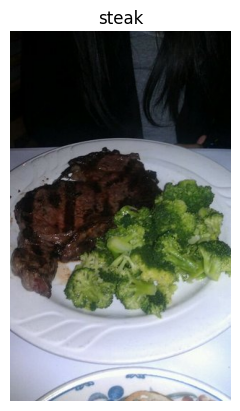

In [32]:
#view a random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="steak")

['1248346.jpg']
Image shape: (306, 512, 3)


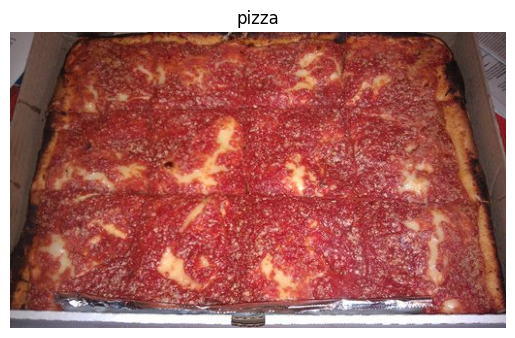

In [13]:
#view a random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [14]:

import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[122, 107, 110],
        [123, 108, 111],
        [124, 109, 112],
        ...,
        [ 72,  57,  62],
        [ 69,  56,  63],
        [ 88,  75,  82]],

       [[121, 106, 109],
        [121, 106, 109],
        [122, 107, 110],
        ...,
        [ 84,  69,  74],
        [ 86,  73,  80],
        [ 84,  71,  78]],

       [[122, 110, 112],
        [122, 110, 112],
        [122, 110, 112],
        ...,
        [ 98,  83,  88],
        [ 91,  78,  85],
        [ 75,  62,  69]],

       ...,

       [[ 79,  71,  84],
        [ 81,  73,  84],
        [ 83,  75,  86],
        ...,
        [ 96,  92, 115],
        [ 96,  92, 115],
        [ 97,  93, 116]],

       [[ 83,  72,  88],
        [ 83,  75,  88],
        [ 86,  78,  91],
        ...,
        [ 95,  90, 112],
        [ 94,  89, 111],
        [ 90,  85, 107]],

       [[ 83,  72,  88],
        [ 85,  74,  90],
        [ 86,  78,  91],
        ...,
        [ 95,  90, 11

In [15]:
#view the image shape
img.shape #returns width, height, color channels

(306, 512, 3)

In [16]:
# Get the all pixcel values between 0 and 1

In [17]:
img/255

array([[[0.47843137, 0.41960784, 0.43137255],
        [0.48235294, 0.42352941, 0.43529412],
        [0.48627451, 0.42745098, 0.43921569],
        ...,
        [0.28235294, 0.22352941, 0.24313725],
        [0.27058824, 0.21960784, 0.24705882],
        [0.34509804, 0.29411765, 0.32156863]],

       [[0.4745098 , 0.41568627, 0.42745098],
        [0.4745098 , 0.41568627, 0.42745098],
        [0.47843137, 0.41960784, 0.43137255],
        ...,
        [0.32941176, 0.27058824, 0.29019608],
        [0.3372549 , 0.28627451, 0.31372549],
        [0.32941176, 0.27843137, 0.30588235]],

       [[0.47843137, 0.43137255, 0.43921569],
        [0.47843137, 0.43137255, 0.43921569],
        [0.47843137, 0.43137255, 0.43921569],
        ...,
        [0.38431373, 0.3254902 , 0.34509804],
        [0.35686275, 0.30588235, 0.33333333],
        [0.29411765, 0.24313725, 0.27058824]],

       ...,

       [[0.30980392, 0.27843137, 0.32941176],
        [0.31764706, 0.28627451, 0.32941176],
        [0.3254902 , 0

#Building and End to End CNN Model

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Fit the CNN to our training data


One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [85]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the random seed
tf.random.set_seed(42)

#Setup path to our directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"



Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [86]:
#Preprocess data (get all of the pixel values between 0 and 1 , also called scalling/Normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)



The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

🔑 Note: For more transformation options such as data augmentation (we'll see this later), refer to the ImageDataGenerator documentation.

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [87]:
#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
#batch_size=32 so the len(train_data 1500/32 approx 47)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

* Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
* The target_size parameter defines the input size of our images in (height, width) format.
* The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
* The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.
We can take a look at our batched images and labels by inspecting the train_data object.

###Build The CNN Model

In [88]:
#Build the cnn model (same as the tiny vgg on the CNN explainer website)
model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, #filter is the number of sliding window going across an input (Higher=more complex model)
                           kernel_size=3, #the size of the sliding window going across an input
                           strides=(1,1), #the size of the step the sliding window takes across an input
                           padding='valid',# if 'same', output shape is same as input shape, if 'valid', output shape gets compressd
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#compile out model
model1.compile(loss='binary_crossentropy',optimizer='adam',
               metrics=['accuracy'])
#fit the model
history1=model1.fit(train_data,epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 93s 2s/step - loss: 0.5874 - accuracy: 0.6680 - val_loss: 0.3856 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 96s 2s/step - loss: 0.4254 - accuracy: 0.8113 - val_loss: 0.3553 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 94s 2s/step - loss: 0.3927 - accuracy: 0.8267 - val_loss: 0.3349 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 93s 2s/step - loss: 0.3655 - accuracy: 0.8473 - val_loss: 0.3348 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 92s 2s/step - loss: 0.3233 - accuracy: 0.8680 - val_loss: 0.3263 - val_accuracy: 0.8560


In [89]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

#using the same model as before

Let;s replicate the model we've built in a previous section to see if it works with our image data. The model we building is from the Tensorflow playground

In [23]:
import tensorflow as tf

In [24]:
#Set the random seed
tf.random.set_seed(42)

#Create a  model to replicate the tensorflow playgrond model
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

#compile the model
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Fit the model
history2=model2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 8s 164ms/step - loss: 1.3237 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 157ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 156ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model1),
model2 perform terribly lets try to improve itm

In [26]:
#Set the random seed
tf.random.set_seed(42)
#build the model
model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

#Compile the model
model3.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
#fit the model
history3=model3.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 22s 439ms/step - loss: 2.7161 - accuracy: 0.6200 - val_loss: 0.5995 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 29s 612ms/step - loss: 1.1130 - accuracy: 0.6780 - val_loss: 0.6298 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 29s 613ms/step - loss: 0.5640 - accuracy: 0.7673 - val_loss: 0.8596 - val_accuracy: 0.5840
Epoch 4/5
47/47 [==============================] - 24s 518ms/step - loss: 0.5984 - accuracy: 0.7420 - val_loss: 1.0177 - val_accuracy: 0.5700
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6254 - accuracy: 0.7307 - val_loss: 0.5501 - val_accuracy: 0.7420


In [27]:
#Get a summary of model3

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
15052900/31000

485.5774193548387

##Binary classification :Let's break down
1. Become one with the data (visualize,visualize,visualize)
2. preprocess the data (prepare it for our model, the main step here was scaling/normalizing)
3. Fit the model
4. Create a model (start with a baseline)
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied(experiment experiment experiment)

['3059843.jpg']
Image shape: (512, 512, 3)
['271779.jpg']
Image shape: (512, 382, 3)


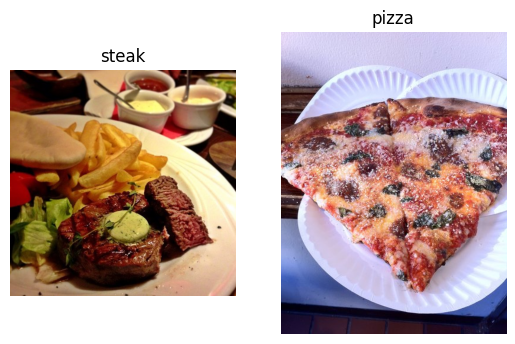

In [34]:
#Vusualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")


###Preprocess the data

In [19]:
#Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test"

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [35]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32

                                             )
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
#Get the sample fo a train data batch
images, labels=train_data.next()  #get the "next" batch of images/labels in train_data
len(images),len(labels)

(32, 32)

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation,MaxPool2D

#Build the model

In [39]:
model4=Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=(1,1),
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')#Output layer binary classification so used activation='sigmoid'
])

#Compile the model
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [40]:
# Check the lengths of training and test data generator
len(train_data),len(test_data)




(47, 16)

In [41]:
#Fit the model
history4=model4.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 120s 3s/step - loss: 0.9937 - accuracy: 0.5267 - val_loss: 0.5341 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 142s 3s/step - loss: 0.4857 - accuracy: 0.7620 - val_loss: 0.4006 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 112s 2s/step - loss: 0.4075 - accuracy: 0.8327 - val_loss: 0.4646 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 125s 3s/step - loss: 0.2331 - accuracy: 0.9147 - val_loss: 0.5931 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 142s 3s/step - loss: 0.1218 - accuracy: 0.9620 - val_loss: 0.8153 - val_accuracy: 0.7180


In [42]:
import pandas as pd


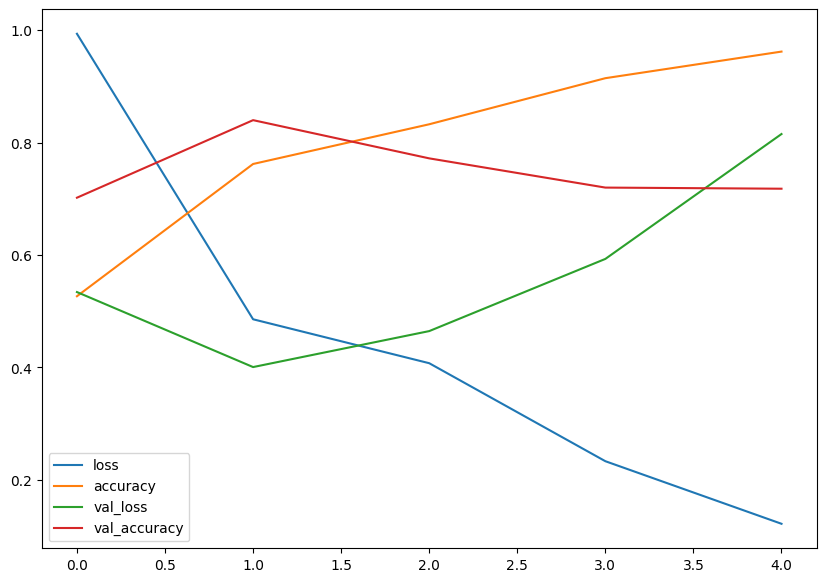

In [43]:
#Lets plot the Training curve
pd.DataFrame(history4.history).plot(figsize=(10,7));


In [36]:
# plot the Training and test loss Seperately
def Plot_loss_curves(history):
  """
  Return seperate loss curves for training and test or valid loss
  """
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))
  #plot loss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title("Loss")
  plt.xlabel('epochs')
  plt.legend()


  #plot accuracy
  plt.figure() # to get another plot in different frame.
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title("Accuracy")
  plt.xlabel('epochs')
  plt.legend()


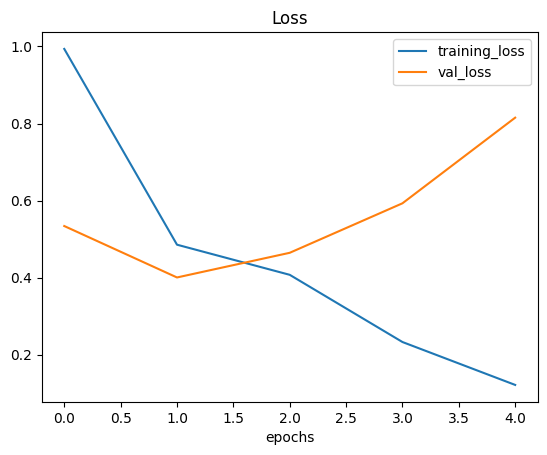

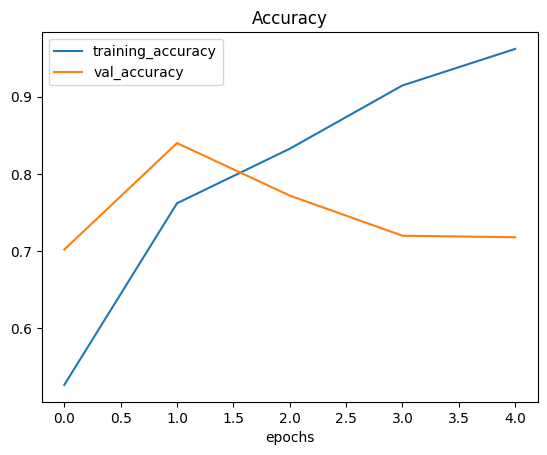

In [45]:
Plot_loss_curves(history4)

**Note:** When a models **validation loss starts to increase** its likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

#Solution: Adjust the model parameters

Fitting a machine learning model comes in 3 steps
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

ways to iduce overfitting:

* Increase the number of conv layers
* Increase the number of conv fitlers
* Add another dense layer to the outpur or flatten layer

Reduce Overfitting:
* Add data augumentation
* Add regularization layers(such as MaxPool2D)
* Add more data...

 **Note:** Reducing overfitting also call regularization.



In [46]:
#Create the model
model5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])


In [47]:
#Compile the model
model5.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'],
                )

In [48]:
#Fit the model
history5=model5.fit(train_data,epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 55s 1s/step - loss: 0.6011 - accuracy: 0.6787 - val_loss: 0.4618 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 62s 1s/step - loss: 0.4853 - accuracy: 0.7753 - val_loss: 0.4200 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 49s 1s/step - loss: 0.4526 - accuracy: 0.8013 - val_loss: 0.3794 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 46s 971ms/step - loss: 0.4123 - accuracy: 0.8200 - val_loss: 0.3431 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 60s 1s/step - loss: 0.3887 - accuracy: 0.8353 - val_loss: 0.3523 - val_accuracy: 0.8400


In [49]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

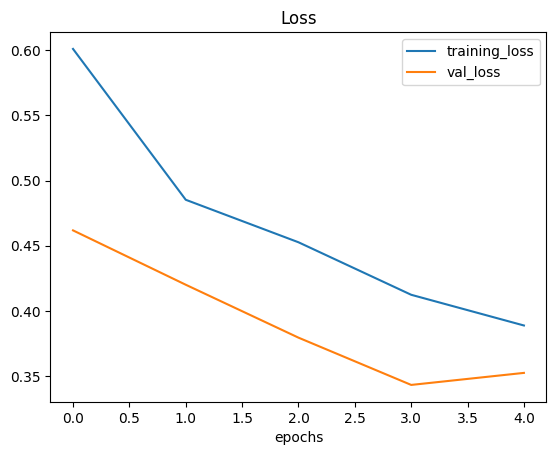

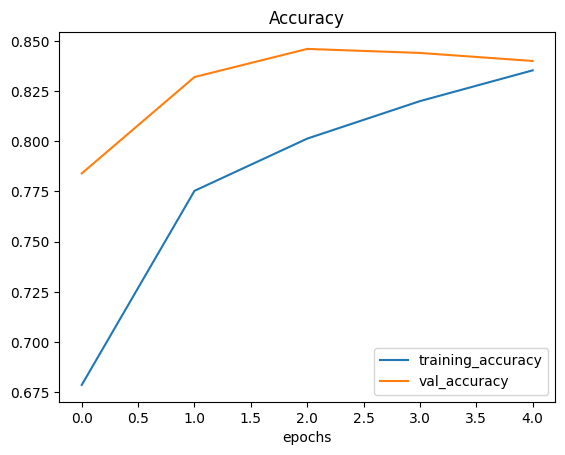

In [50]:
Plot_loss_curves(history5)

###Opening our bag of tricks and finding data augmentation

In [51]:


# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True
                                           )
#Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.,
                                 rotation_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.3,
                                 horizontal_flip=True)
#non-augmented data
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#What is data Augmentation?
Data augumentation is the process of altering our training
data, leading it to have more diversity and in turn allowing
our models to learn more generalizable (hopefully) patterns.
Aletering might mean adjusting the rotation of an image, flipping it, cropping it or soemething simmilar

In [52]:
# Import data augment it from training directory
print("Augmented training data:")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode='binary',
                                                 shuffle=False)
print("Non- Augmented data")
#Create non-augmented train data batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False
                                             )



#Create non-augmented test data batches

test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False
                                             )






Augmented training data:
Found 1500 images belonging to 2 classes.
Non- Augmented data
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [53]:
# Get sample data batches
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()

showing image number:16


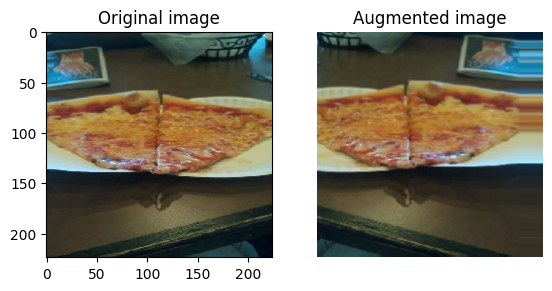

In [54]:
#show original and augmented images
import random
random_number=random.randint(0,20)# our batch sizes are 32
plt.subplot(1,2,1)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Let's build the model and see how augmented data looks like

In [55]:
#Create a model (same )

model6=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

#compile the model
model6.compile(loss='binary_crossentropy',optimizer='adam',
               metrics=['accuracy'])

#fit the model
history6=model6.fit(train_data_augmented,
           epochs=5,
           steps_per_epoch=len(train_data_augmented),
           validation_data=test_data,
           validation_steps=len(test_data)
           )

Epoch 1/5
47/47 [==============================] - 71s 2s/step - loss: 0.7260 - accuracy: 0.4533 - val_loss: 0.6925 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6923 - val_accuracy: 0.6000
Epoch 3/5
47/47 [==============================] - 61s 1s/step - loss: 0.6934 - accuracy: 0.5267 - val_loss: 0.6914 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 66s 1s/step - loss: 0.6924 - accuracy: 0.5500 - val_loss: 0.6913 - val_accuracy: 0.6080
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.6945 - accuracy: 0.5227 - val_loss: 0.6905 - val_accuracy: 0.5020


Lets train model with suffle agumented training data and see whats happen

In [56]:
#import data and augment it and shuffle from training directory
train_data_augmented_shuffle=train_datagen_augmented.flow_from_directory(
    train_dir, target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [57]:
#Create the model
model7=Sequential([
    Conv2D(10,3,activation='relu',
           input_shape=(224,224,3),
           ),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])




In [58]:
#Compile the model
model7.compile(loss='binary_crossentropy',
               metrics=['accuracy'])



In [62]:
#fit the train_data_augmented_suffle,
model7.fit(train_data_augmented_shuffle,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffle),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.6598 - accuracy: 0.5987 - val_loss: 0.5918 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 62s 1s/step - loss: 0.6050 - accuracy: 0.6760 - val_loss: 0.5503 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 62s 1s/step - loss: 0.5644 - accuracy: 0.7073 - val_loss: 0.4157 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 61s 1s/step - loss: 0.5256 - accuracy: 0.7493 - val_loss: 0.3756 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.4998 - accuracy: 0.7647 - val_loss: 0.5005 - val_accuracy: 0.7440


In [ ]:
#check Loss curves
plot_loss_curves(history7)

#7. Repeat untill satisfied

Since we already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g add more `Conv2D/` `MaxPool2D` layers)

* Increase the number of filters in each convolution in each convolutional layer (e.g. from 10 to 32 or even 64)

* train for longer (more epochs)
* Get more data (give the model more opportunities to learn)
* Use transfer learning to leverage what another image has learn and adjust it for our own use case


## Making a prediction with our trained mode on our own custom data.

In [ ]:
#Classes we're working with
print(class_names)

--2024-02-11 04:51:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  9.69MB/s    in 0.2s    

2024-02-11 04:51:51 (9.69 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



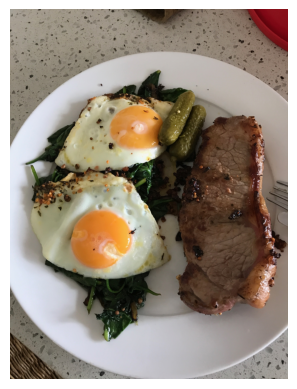

In [63]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [64]:
model7.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)


**Note:** When you train a neural network and you want to make prediction with it on your own custom data, it's important that your custom data (or new  data) is preprocessed into the same format a sthe data your model wa trained on.

In [95]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img




In [96]:
#Load in and preprocess our custom image (unseen image)
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [97]:
pred=model7.predict(tf.expand_dims(steak,axis=0));pred  #if we not expand the dim it will give error

1/1 [==============================] - 0s 44ms/step


array([[0.95275503]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a predictioin probabilities, would'nt it be nice if we could visualize the image as well as the model's prediction?

In [98]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [99]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [108]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 169ms/step
[[0.742406]]


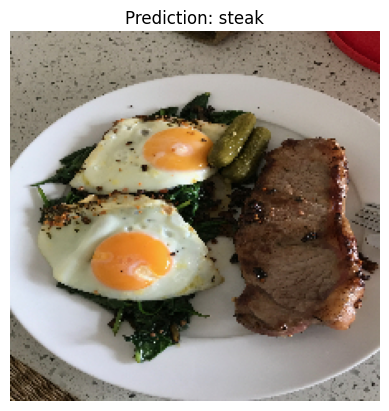

In [120]:
#Test our model on a custom image on all previoud models

pred_and_plot(model5,"03-steak.jpeg",class_names
              )

In [110]:
#our model works Let's try it on another image this time pizza

In [111]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2024-02-11 06:02:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  12.2MB/s    in 0.2s    

2024-02-11 06:02:42 (12.2 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]



1/1 [==============================] - 0s 32ms/step
[[0.2123174]]


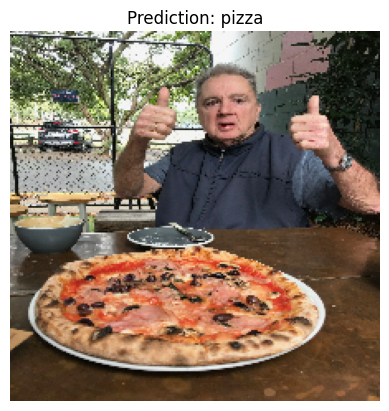

In [121]:
pred_and_plot(model5,"/content/03-pizza-dad.jpeg.1",class_names)

#Multiclass Classfication

1. Become one with the data
2. Preprocess the data (get it ready for a model
3. Create a model (start with a baseline)
4. Fit the model (Overfit it to make sure works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repaet untill satisfied


In [11]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip the downloaded file
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-11 11:13:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 74.125.141.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  49.1MB/s    in 5.1s    

2024-02-11 11:13:07 (96.5 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [12]:
#Walk through 10 classes of food image data
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in '10_food_classes_all_data'. 
There are 10 directories and 0 images in '10_food_classes_all_data/test'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.

We'll set the training and test directory path

In [13]:
# Set up the trian and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [14]:
#Class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['999550.jpg']
Image shape: (512, 512, 3)


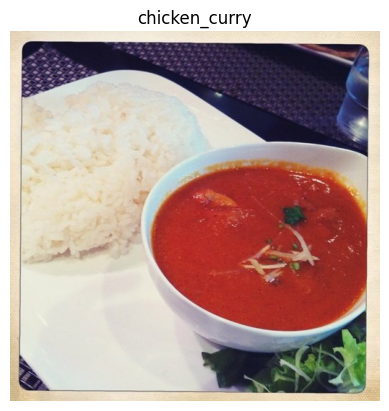

In [19]:
#Visualize visualize visualize
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

#Preprocess the data


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#Create the CNN Model

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

In [24]:
#cnn model same at CNN Explainer websit
model8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')

])

#Compile the model
model8.compile(loss='categorical_crossentropy',optimizer='adam',
               metrics=['accuracy'])
#Fit the model
history8=model8.fit(train_data,epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=int(len(test_data)))


Epoch 1/5
235/235 [==============================] - 595s 3s/step - loss: 2.2557 - accuracy: 0.1497 - val_loss: 2.1999 - val_accuracy: 0.1960
Epoch 2/5
235/235 [==============================] - 607s 3s/step - loss: 2.0128 - accuracy: 0.2897 - val_loss: 1.9785 - val_accuracy: 0.2996
Epoch 3/5
235/235 [==============================] - 535s 2s/step - loss: 1.5033 - accuracy: 0.5015 - val_loss: 2.0983 - val_accuracy: 0.2956
Epoch 4/5
235/235 [==============================] - 506s 2s/step - loss: 0.8448 - accuracy: 0.7299 - val_loss: 2.4848 - val_accuracy: 0.2852
Epoch 5/5
235/235 [==============================] - 526s 2s/step - loss: 0.3687 - accuracy: 0.8891 - val_loss: 3.7570 - val_accuracy: 0.2676


In [27]:
model8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [26]:
#Evaluate the model
model8.evaluate(test_data)

79/79 [==============================] - 71s 892ms/step - loss: 3.7570 - accuracy: 0.2676


[3.757023811340332, 0.26759999990463257]

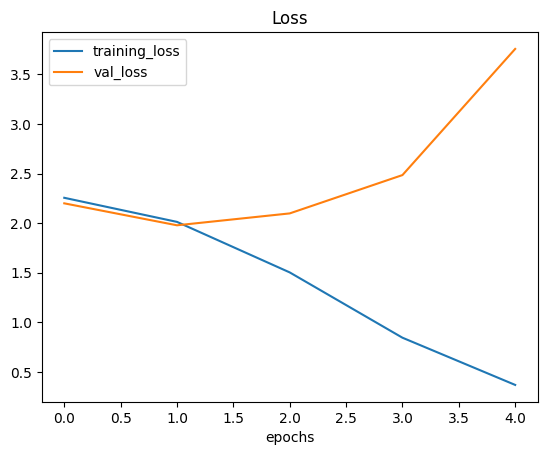

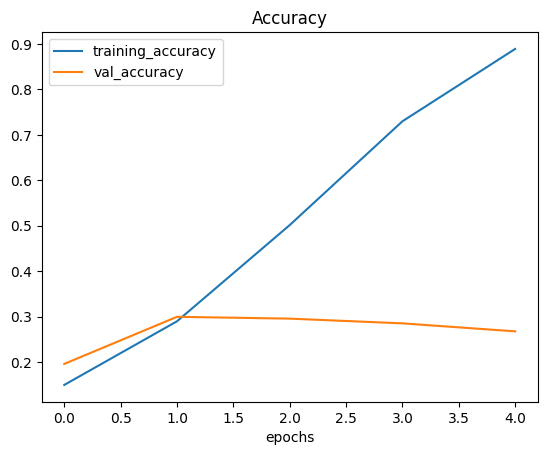

In [38]:
#Plot loss curve
Plot_loss_curves(history8)

What do these loss curves tell us?
well... it seems our model is **overfitting** the training set quite badly.. in other words, it's getting great results on the training data but fails to generalize well to usnseen data and performs poorly on test data set

###Adjust the models parameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

* **Get more data -** Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* **Simplify model -** If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* **Use data augmentation -** Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* **Use transfer learning -** Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

🔑 Note: Preventing overfitting is also referred to as regularization.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [40]:
model9=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(10,activation='softmax')

])


#Compile the model
model9.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
#fit the mdoel with
history9=model9.fit(train_data,epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 281s 1s/step - loss: 2.1647 - accuracy: 0.2332 - val_loss: 1.9693 - val_accuracy: 0.2976
Epoch 2/5
235/235 [==============================] - 282s 1s/step - loss: 1.4973 - accuracy: 0.5091 - val_loss: 2.0445 - val_accuracy: 0.3012
Epoch 3/5
235/235 [==============================] - 244s 1s/step - loss: 0.5808 - accuracy: 0.8293 - val_loss: 2.7348 - val_accuracy: 0.2624
Epoch 4/5
235/235 [==============================] - 235s 998ms/step - loss: 0.1508 - accuracy: 0.9664 - val_loss: 3.8318 - val_accuracy: 0.2568
Epoch 5/5
235/235 [==============================] - 243s 1s/step - loss: 0.0416 - accuracy: 0.9936 - val_loss: 4.3107 - val_accuracy: 0.2440


In [42]:
model9.evaluate(test_data)

79/79 [==============================] - 41s 517ms/step - loss: 4.3107 - accuracy: 0.2440


[4.310651779174805, 0.24400000274181366]

In [43]:
model9.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7bed2ec289a0>>

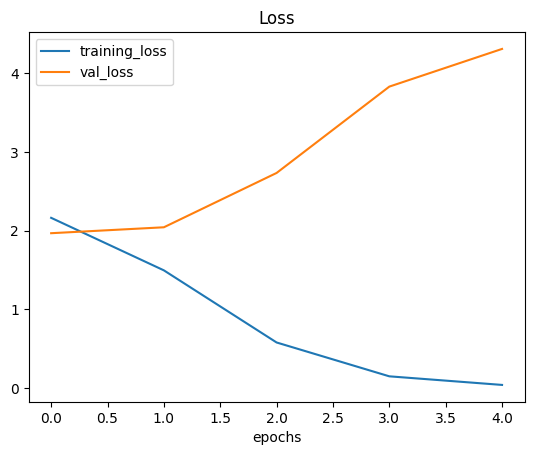

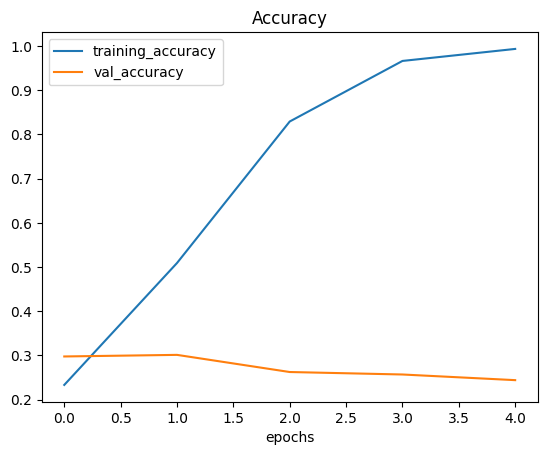

In [45]:
Plot_loss_curves(history9)


Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about **data augmentation?**

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new ImageDataGenerator instance, this time adding some parameters such as rotation_range and horizontal_flip to manipulate our images.

In [46]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_10).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

🔑 Note: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [1]:
# Clone the model (use the same architecture)
model_10 = tf.keras.models.clone_model(model8)

# Compile the cloned model (same setup as used for model9)
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

NameError: name 'tf' is not defined

You can see it each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

Note: One way to improve this time taken is to use augmentation layers directly as part of the model. For example, with tf.keras.layers.RandomFlip. You can also speed up data loading with the newer tf.keras.utils.image_dataset_from_directory image loading API (we cover this later in the course).

In [48]:
# Check out our model's performance with augmented data
plot_loss_curves(history_10)

NameError: name 'plot_loss_curves' is not defined

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

#Repeat until satisfied
We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

#Making a prediction with our trained model
What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [49]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [50]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Okay, we've got some custom images to try, let's use the pred_and_plot function to make a prediction with model_11 on one of the images and plot it.

In [51]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

NameError: name 'pred_and_plot' is not defined

Hmm... it looks like our model got the prediction wrong, how about we try another?

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)


And again, it's predicting chicken_curry for some reason.

How about one more?

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

hicken_curry again? There must be something wrong...

I think it might have to do with our pred_and_plot function.

Let's makes a prediction without using the function and see where it might be going wrong.

In [52]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

NameError: name 'load_and_prep_image' is not defined

Much better! There must be something up with our pred_and_plot function.

And I think I know what it is.

The pred_and_plot function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the predict function.

In [53]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

NameError: name 'model_11' is not defined

Since our model has a 'softmax' activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using argmax and then use that to index our class_names list to output the predicted class.

In [54]:
# Find the predicted class name
class_names[pred.argmax()]

NameError: name 'pred' is not defined


Knowing this, we can readjust our pred_and_plot function to work with multiple classes as well as binary classes.

In [55]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


Let's try it out. If we've done it right, using different images should lead to different outputs (rather than chicken_curry every time).

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We'll see how to improve this later on (spolier: transfer learning is going to step things up a notch).

#Saving and loading our model
Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the save and load_model functions.

In [ ]:
# Save a model
model_11.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)